In [11]:
import matplotlib.pyplot as plt
import numpy as np
import random
import sys

# Importing the functions from the Functions.py file
sys.path.append('../')

from Functions import *

User positions:

[[  70.93599308 -174.78627445    0.        ]
 [ -57.12910526  191.55471396    0.        ]
 [ -86.8924637   194.43412952    0.        ]
 [ 434.27836577  323.33884438    0.        ]]
Transmit antenna(e) coordinates:
 [[ 0.      -0.09375 20.     ]
 [ 0.      -0.03125 20.     ]
 [ 0.       0.03125 20.     ]
 [ 0.       0.09375 20.     ]]

IRS 1 elements coordinates:
 [[59.96875 79.96875 10.     ]
 [60.03125 79.96875 10.     ]
 [59.96875 80.03125 10.     ]
 [60.03125 80.03125 10.     ]]

IRS 2 elements coordinates:
 [[ 59.96875 -80.03125  10.     ]
 [ 60.03125 -80.03125  10.     ]
 [ 59.96875 -79.96875  10.     ]
 [ 60.03125 -79.96875  10.     ]]



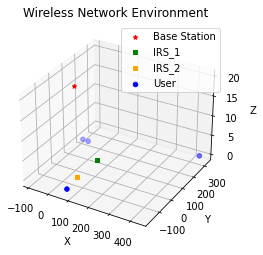

In [14]:
#============== System parameters
'''
Nt = Number of transmit antennas (SISO = 1)
K = Number of Users
BW = Bandwidth
NF = Noise Floor
ALPHA = PLE for direct link
BETA = PLE for indirect link
wn = efficiency of transmit power amplifier

'''
Nt = 4
K = 4

# gamma = db2pow(20)
f = 2.4e9
c = 3e8

Lambda = c/f
halfLambda = 0.5*Lambda
quarterLambda = 0.25*Lambda

# BW = 20e6
# NF = 10
# noise = -174+10*np.log10(BW) + NF

# beta_min = 0.2
# k = 1.6
# phi = 0.43 * np.pi

GRID_RADIUS = 1000
BASE_STATION_POSITION = (0, 0, 20)
TRANSMIT_POWER_WATTS = 1 #in watts
FADING_STD_MEAN = 0
FADING_STD_DEV = np.sqrt(0.5)
# FADING_STD_DEV = 3

BETA1 = 2.8 #path loss exponent (indirect) bs -> irs
BETA2 = 2.2  #path loss exponent (indirect) irs -> user
ALPHA = 3.8 #path loss exponent (direct) bs -> user
# m = 2
# omega = np.sqrt(0.5)

IRS_POSITION_1 = (60, 80, 10)
IRS_POSITION_2 = (60, -80, 10)
nIRSrow = 2
nIRScol = nIRSrow
Ns = nIRSrow * nIRScol

# refdis = np.sqrt(20)

# Power consumption params
# wn = 0.5
# Pt = 10 * np.log10(TRANSMIT_POWER_WATTS) + 30 # in dBm
# Pb = 10 # in dBw
# Pu = 10 # in dBm
# Pt = 10 * np.log10(TRANSMIT_POWER_WATTS) + 30 # in dBm
# Pb = 10 # in dBw
# Pu = 10 # in dBm

# Generate user positions
# USER_POSITION = (50,5,0)
user_positions = generate_user_positions_3D(K, GRID_RADIUS)
loc_U = user_positions
print('User positions:'"\n")
print(loc_U)

# Generate antennas position
AP_position = generate_station_positions_3D(BASE_STATION_POSITION)
xt, yt, zt = AP_position[0]
tx_ant_coords = generate_transmit_antenna_coordinates_3D(Nt, xt, yt, zt, halfLambda, quarterLambda)
loc_T = tx_ant_coords

print('Transmit antenna(e) coordinates:'"\n", loc_T) 
print()


# Generate IRS position_1
irs_position_1 = generate_IRS_3D(IRS_POSITION_1)
xs_1, ys_1, zs_1 = irs_position_1[0]

irs_coords_1 = generate_irs_coordinates_3D(xs_1, ys_1, zs_1, nIRSrow, nIRScol, halfLambda, quarterLambda)
loc_S_1 = irs_coords_1

print('IRS 1 elements coordinates:'"\n", loc_S_1) 
print()

# Generate IRS position_2
irs_position_2 = generate_IRS_3D(IRS_POSITION_2)
xs_2, ys_2, zs_2 = irs_position_2[0]

irs_coords_2 = generate_irs_coordinates_3D(xs_2, ys_2, zs_2, nIRSrow, nIRScol, halfLambda, quarterLambda)
loc_S_2 = irs_coords_2

print('IRS 2 elements coordinates:'"\n", loc_S_2) 
print()

# dTU, dSU_1, dTS_1 = calculate_distances_3D(loc_U, loc_T, loc_S_1)
# dTU, dSU_2, dTS_2 = calculate_distances_3D(loc_U, loc_T, loc_S_2)

# # Reshapiing the distance from antennas/BS to user
# dTU = dTU.reshape(Nt,K)
# # Compute row-wise averages
# dSU_1 = np.mean(dSU_1, axis=1, keepdims=True)
# dSU_1 = dSU_1.reshape(1,K)
# # Compute the sum of elements in each row
# dTS_1 = np.mean(dTS_1, axis=1)
# # Compute the average of row sums
# dTS_1 = np.mean(dTS_1)
# # Compute row-wise averages
# dSU_2 = np.mean(dSU_2, axis=1, keepdims=True)
# dSU_2 = dSU_2.reshape(1,K)
# # Compute the sum of elements in each row
# dTS_2 = np.mean(dTS_2, axis=1)
# # Compute the average of row sums
# dTS_2 = np.mean(dTS_2)

# Plot the 3D grid, base station, IRS, and user positions
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xt, yt, zt, color='red', marker='*', label='Base Station')
plt.scatter(IRS_POSITION_1[0], IRS_POSITION_1[1], IRS_POSITION_1[2], color='green', marker='s', label='IRS_1')
plt.scatter(IRS_POSITION_2[0], IRS_POSITION_2[1], IRS_POSITION_2[2],color='orange', marker='s', label='IRS_2')
ax.scatter(user_positions[:, 0], user_positions[:, 1], color='blue', marker='o', label='User')
ax.xlim = (-GRID_RADIUS, GRID_RADIUS)
ax.ylim = (-GRID_RADIUS, GRID_RADIUS)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Wireless Network Environment')
ax.legend()
ax.grid(True)

plt.show()